In [22]:
import pandas as pd
# From http://pandas.pydata.org/pandas-docs/version/0.23/visualization.html
# http://pandas.pydata.org/pandas-docs/version/0.23/visualization.html#scatter-matrix-plot
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np


hd5_filename="ftp_performance.time.h5"
store = pd.HDFStore(hd5_filename)
print(store.info())
print(dir(store))
store.df_mi
df=store.df_mi
cs=store.df_cs
df.rename(columns={0:'bandwidth'}, inplace="true")
cs.bandwidth=cs.bandwidth.astype(float)
print(df)
print(cs)


<class 'pandas.io.pytables.HDFStore'>
File path: ftp_performance.time.h5
/df_cs            frame        (shape->[1,5]) 
/df_mi            frame        (shape->[36,1])
['__bytes__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__fspath__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_check_if_open', '_complevel', '_complib', '_create_storer', '_filters', '_fletcher32', '_handle', '_mode', '_path', '_read_group', '_validate_format', '_write_to_group', 'append', 'append_to_multiple', 'close', 'copy', 'create_table_index', 'filename', 'flush', 'get', 'get_node', 'get_storer', 'groups', 'info', 'is_ope

In [23]:
print(df.info())
print(40*'6')
print(df.index)
# print(dir(df))
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36 entries, (1024, 1e-09, 0.0, IPv4) to (2048, 20.0, 20.0, IPv6)
Data columns (total 1 columns):
bandwidth    36 non-null float64
dtypes: float64(1)
memory usage: 729.0+ bytes
None
6666666666666666666666666666666666666666
MultiIndex(levels=[[1024, 2048], [1e-09, 10.0, 20.0], [0.0, 10.0, 20.0], ['IPv4', 'IPv6']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], [0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['SIZE', 'LOSS', 'DELAY', 'PROTOCOL'])
Index(['bandwidth'], dtype='object', name='data_rate')


In [24]:
print(cs.info())
print(40*'@')
print(cs.index)
# print(dir(df))
print(cs.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 5 columns):
SIZE         36 non-null object
LOSS         36 non-null object
DELAY        36 non-null object
PROTOCOL     36 non-null object
bandwidth    36 non-null float64
dtypes: float64(1), object(4)
memory usage: 1.7+ KB
None
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35],
           dtype='int64')
Index(['SIZE', 'LOSS', 'DELAY', 'PROTOCOL', 'bandwidth'], dtype='object')


In [25]:
ipv4_bool_vec=cs['PROTOCOL'] == "IPv4"
ipv6_bool_vec=np.invert(ipv4_bool_vec)
loss_0_bool_vec=cs['LOSS'] == "1e-09"
delay_0_bool_vec=cs['DELAY'] == "0.0"
size_4096_bool_vec=cs['SIZE']=='4096'

In [56]:
cs[ipv6_bool_vec & delay_0_bool_vec ]

,SIZE,LOSS,DELAY,PROTOCOL,bandwidth
1,1024,1e-09,0.0,IPv6,5688.888889
7,1024,10.0,0.0,IPv6,2625.641026
13,1024,20.0,0.0,IPv6,747.445255
19,2048,1e-09,0.0,IPv6,7585.185185
25,2048,10.0,0.0,IPv6,4179.591837
31,2048,20.0,0.0,IPv6,7314.285714


In [27]:
cs[delay_0_bool_vec & size_4096_bool_vec ]

,SIZE,LOSS,DELAY,PROTOCOL,bandwidth


In [28]:
bv_1_4=ipv4_bool_vec & ( cs.DELAY=="0.0" ) & size_4096_bool_vec
bv_1_6=ipv6_bool_vec & ( cs.DELAY=="0.0" ) & size_4096_bool_vec
print(cs[bv_1_4],"\n",cs[bv_1_6])

Empty DataFrame
Columns: [SIZE, LOSS, DELAY, PROTOCOL, bandwidth]
Index: [] 
 Empty DataFrame
Columns: [SIZE, LOSS, DELAY, PROTOCOL, bandwidth]
Index: []


Text(0, 0.5, 'Bandwidth Bytes/sec')

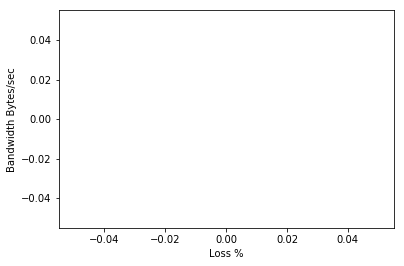

In [29]:
plt.plot(cs.LOSS[bv_1_4],cs.bandwidth[bv_1_4], 'go-', cs.LOSS[bv_1_6],
        cs.bandwidth[bv_1_6], 'r^-', linewidth=1.0)
# plt.plot(cs.LOSS[(cs['PROTOCOL']=='IPv6')],cs.bandwidth[(cs['PROTOCOL']=='IPv6')])
plt.xlabel("Loss %")
plt.ylabel("Bandwidth Bytes/sec")

In [30]:
bv_1_4=ipv4_bool_vec & ( cs.DELAY=="10.0" ) & size_4096_bool_vec
bv_1_6=ipv6_bool_vec & ( cs.DELAY=="10.0" ) & size_4096_bool_vec
print(cs[bv_1_4],"\n",cs[bv_1_6])

Empty DataFrame
Columns: [SIZE, LOSS, DELAY, PROTOCOL, bandwidth]
Index: [] 
 Empty DataFrame
Columns: [SIZE, LOSS, DELAY, PROTOCOL, bandwidth]
Index: []


Text(0, 0.5, 'Bandwidth Bytes/sec')

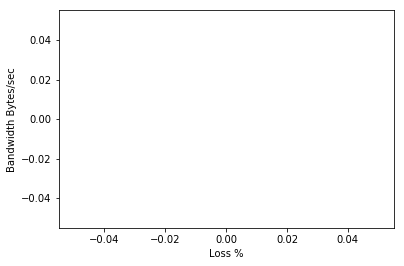

In [31]:
plt.plot(cs.LOSS[bv_1_4],cs.bandwidth[bv_1_4], 'go-', cs.LOSS[bv_1_6],
        cs.bandwidth[bv_1_6], 'r^-', linewidth=1.0)
# plt.plot(cs.LOSS[(cs['PROTOCOL']=='IPv6')],cs.bandwidth[(cs['PROTOCOL']=='IPv6')])
plt.xlabel("Loss %")
plt.ylabel("Bandwidth Bytes/sec")


Empty DataFrame
Columns: [SIZE, LOSS, DELAY, PROTOCOL, bandwidth]
Index: [] 
 Empty DataFrame
Columns: [SIZE, LOSS, DELAY, PROTOCOL, bandwidth]
Index: []


Text(0, 0.5, 'Bandwidth Bytes/sec')

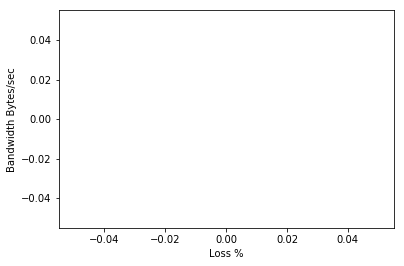

In [32]:
bv_1_4=ipv4_bool_vec & ( cs.DELAY=="20.0" ) & size_4096_bool_vec
bv_1_6=ipv6_bool_vec & ( cs.DELAY=="20.0" ) & size_4096_bool_vec
print(cs[bv_1_4],"\n",cs[bv_1_6])
plt.plot(cs.LOSS[bv_1_4],cs.bandwidth[bv_1_4], 'go-', cs.LOSS[bv_1_6],
        cs.bandwidth[bv_1_6], 'r^-', linewidth=1.0)
# plt.plot(cs.LOSS[(cs['PROTOCOL']=='IPv6')],cs.bandwidth[(cs['PROTOCOL']=='IPv6')])
plt.xlabel("Loss %")
plt.ylabel("Bandwidth Bytes/sec")

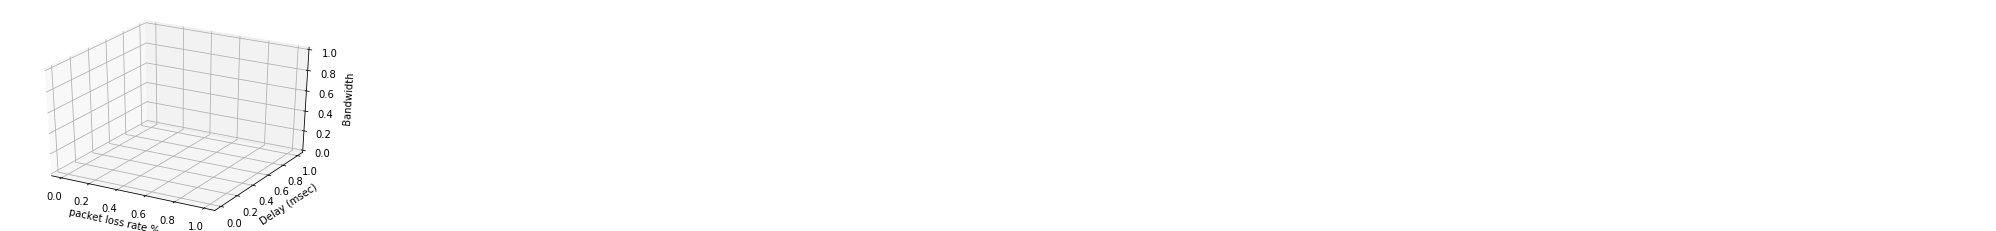

In [33]:
# From https://pythonprogramming.net/matplotlib-3d-scatterplot-tutorial/
# This does NOT work in a jupyter notebook.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=cs.LOSS[ipv4_bool_vec & size_4096_bool_vec ]
y=cs.DELAY[ipv4_bool_vec & size_4096_bool_vec]
z=cs.bandwidth[ipv4_bool_vec & size_4096_bool_vec]

ax.scatter(x, y, z, c='r', marker='o')

# Note, IPv6!
x=cs.LOSS[ipv6_bool_vec & size_4096_bool_vec ]

ax.scatter(x, y, z, c='g', marker='^')

ax.set_xlabel('packet loss rate %')
ax.set_ylabel('Delay (msec)')
ax.set_zlabel('Bandwidth')

plt.show()


Text(0, 0.5, 'Bandwidth Bytes/sec')

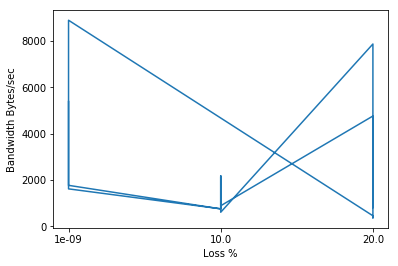

In [34]:
import matplotlib.pyplot as plt
plt.plot(cs.LOSS[(cs['PROTOCOL']=='IPv4')],cs.bandwidth[(cs['PROTOCOL']=='IPv4')])
# plt.plot(cs.LOSS[(cs['PROTOCOL']=='IPv6')],cs.bandwidth[(cs['PROTOCOL']=='IPv6')])
plt.xlabel("Loss %")
plt.ylabel("Bandwidth Bytes/sec")

Text(0, 0.5, 'Bandwidth Bytes/sec')

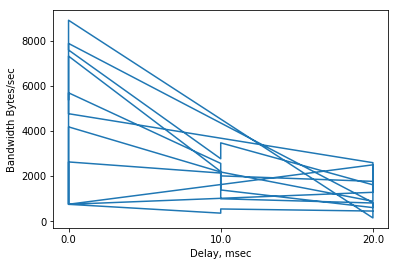

In [35]:
plt.plot(cs.DELAY,cs.bandwidth)
plt.xlabel("Delay, msec")
plt.ylabel("Bandwidth Bytes/sec")

Text(0, 0.5, 'Bandwidth Bytes/sec')

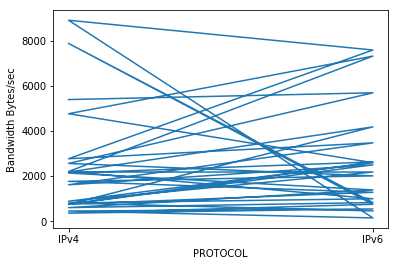

In [36]:
plt.plot(cs.PROTOCOL,cs.bandwidth)
plt.xlabel("PROTOCOL")
plt.ylabel("Bandwidth Bytes/sec")

Text(0, 0.5, 'Bandwidth Bytes/sec')

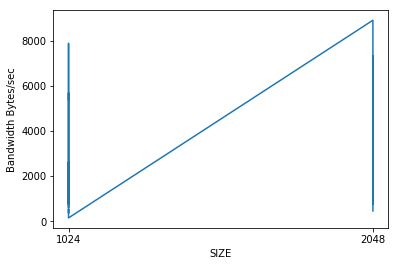

In [37]:
plt.plot(cs.SIZE, cs.bandwidth)
plt.xlabel("SIZE")
plt.ylabel("Bandwidth Bytes/sec")

In [38]:
cs.PROTOCOL


0     IPv4
1     IPv6
2     IPv4
3     IPv6
4     IPv4
5     IPv6
6     IPv4
7     IPv6
8     IPv4
9     IPv6
10    IPv4
11    IPv6
12    IPv4
13    IPv6
14    IPv4
15    IPv6
16    IPv4
17    IPv6
18    IPv4
19    IPv6
20    IPv4
21    IPv6
22    IPv4
23    IPv6
24    IPv4
25    IPv6
26    IPv4
27    IPv6
28    IPv4
29    IPv6
30    IPv4
31    IPv6
32    IPv4
33    IPv6
34    IPv4
35    IPv6
Name: PROTOCOL, dtype: object